In [ ]:
!git clone https://github.com/mperezcarrasco/PyTorch-DAGMM.git
%cd PyTorch-DAGMM
!pip install barbar

Cloning into 'PyTorch-DAGMM'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 102 (delta 47), reused 61 (delta 20), pack-reused 0
Receiving objects: 100% (102/102), 1.83 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/PyTorch-DAGMM
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd 

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [ ]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-4
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/198371: [>...............................] - ETA 0.0s

/content/PyTorch-DAGMM/forward_step.py:79: UserWarning: torch.cholesky is deprecated in favor of torch.linalg.cholesky and will be removed in a future PyTorch release.
L = torch.cholesky(A)
should be replaced with
L = torch.linalg.cholesky(A)
and
U = torch.cholesky(A, upper=True)
should be replaced with
U = torch.linalg.cholesky(A).mH().
This transform will produce equivalent results for all valid (symmetric positive definite) inputs. (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1744.)
  l = torch.cholesky(a, False)


198371/198371: [===============================>] - ETA 0.2s
Training DAGMM... Epoch: 0, Loss: 15184518.175
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 1, Loss: 15189973.057
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 2, Loss: 15184839.469
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 3, Loss: 15191626.706
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 4, Loss: 15190298.588
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 5, Loss: 15184957.108
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 6, Loss: 15181274.923
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 7, Loss: 15197577.139
198371/198371: [===============================>] - ETA 0.0s
Training DAGMM... Epoch: 8, Loss: 15185708.531
198371/198371: [============

In [ ]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...
Precision : 0.8116, Recall : 0.6953, F-score : 0.7489
ROC AUC score: 95.07


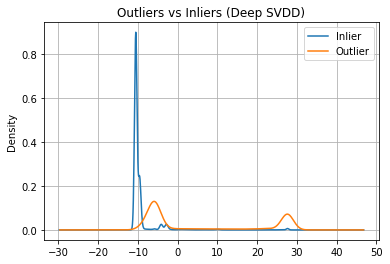

In [ ]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()